## Observations and Insights 

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_pharm_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_pharm_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
combined_pharm_df["Mouse ID"].value_counts()

g989    13
w914    10
r944    10
x402    10
l897    10
        ..
x226     1
x336     1
v199     1
t573     1
n482     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
  # Optional: Get all the data for the duplicate mouse ID. This is shown in the dataframe of duplicate_mice (below).
duplicate_mice = combined_pharm_df[combined_pharm_df.duplicated()]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_pharm_df.drop_duplicates(keep='first', inplace=True)
combined_pharm_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
combined_pharm_df["Mouse ID"].value_counts()

g989    12
w914    10
r944    10
x402    10
l897    10
        ..
x226     1
x336     1
v199     1
t573     1
n482     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Pandas describe table (mean=mean, 50%=median, std=standard deviation; variance and SEM are additional components (see below))
stats_pharm_df = combined_pharm_df[['Drug Regimen','Tumor Volume (mm3)']].groupby("Drug Regimen").describe()
stats_pharm_df

Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  160.0  52.368318  6.502160  45.000000  47.107256   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.909965  56.259803  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

In [7]:
# Group data by Drug Regimen
gr_regimen = combined_pharm_df.groupby(["Drug Regimen"])
drug = combined_pharm_df['Drug Regimen'].unique()

# Caluculate user defined statistics
mean_tumor = gr_regimen['Tumor Volume (mm3)'].mean()
median_tumor = gr_regimen['Tumor Volume (mm3)'].median()
var_tumor = gr_regimen['Tumor Volume (mm3)'].var()
std_tumor = gr_regimen['Tumor Volume (mm3)'].std()
sem_tumor = gr_regimen['Tumor Volume (mm3)'].sem()

# Create dataframe with user defined statistics

summary_stats = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor,
    "Median Tumor Volume": median_tumor,
    "Tumor Volume Variance": var_tumor,
    "Tumor Volume Std Dev.": std_tumor,
    "Tumor Volume Std Error": sem_tumor})

summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev.,Tumor Volume Std Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

agg_stats = (combined_pharm_df.groupby(["Drug Regimen"])['Tumor Volume (mm3)']).agg(['mean', 'median', 'var', 'std', 'sem'])
agg_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# Create dataframe for plotting total number of measurements taken on each drug regimen
gr_regimen = combined_pharm_df.groupby(["Drug Regimen"])
drug = combined_pharm_df['Drug Regimen'].unique()

mouse = gr_regimen["Mouse ID"].count()
# Create dataframe for plotting count of mice per drug regimen
bar_data_df = pd.DataFrame({"Mouse ID": mouse})
bar_data_df = bar_data_df.sort_values('Mouse ID', ascending=False)
bar_data_df

,Mouse ID
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


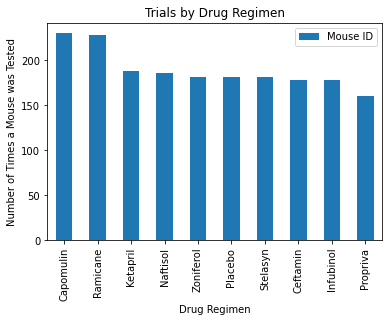

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
plotdata = bar_data_df
plotdata.plot(kind="bar")

# Set titles
plt.title("Trials by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Times a Mouse was Tested")
plt.show()

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#Set x axis and tick locations
x_axis = np.arange(len(bar_data_df["Mouse ID"]))  
tick_locations = [value for value in x_axis]

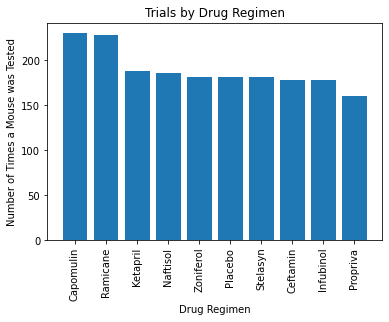

In [12]:
#  NEED TO DETERMINE WHY VALUES ARE NOT THE SAME AS PANDAS

plt.bar(x_axis, bar_data_df["Mouse ID"])
plt.xticks(tick_locations, bar_data_df.index.values, rotation=90)
plt.title("Trials by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Times a Mouse was Tested")
plt.show()

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gr_sex = mouse_metadata.groupby(["Sex"])
sex_val = mouse_metadata['Sex'].unique()

sex = gr_sex["Sex"].count()
sex_count = sex

sex_data_df = pd.DataFrame({"Sex": sex})
sex_data_df


,Sex
Sex,
Female,124
Male,125


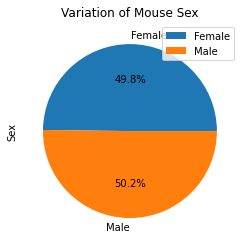

In [14]:
sex_data_df.plot(kind="pie", labels=sex_data_df.index.values, autopct="%1.1f%%", subplots=True)
plt.title("Variation of Mouse Sex")
plt.show()

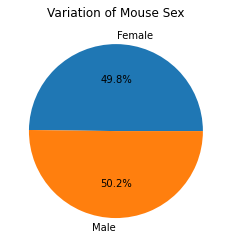

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# labels = gr_sex["Sex"].unique()
# sizes = gr_sex["Sex"].count()

plt.pie(sex_data_df["Sex"], labels=sex_data_df.index.values, autopct="%0.1f%%")
plt.title("Variation of Mouse Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse (max of timepoint for each mouse)
max_tumor = combined_pharm_df.groupby("Mouse ID").max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_tumor = max_tumor[["Mouse ID","Timepoint"]].merge(combined_pharm_df, on=["Mouse ID","Timepoint"], how='left')

# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_data = merged_tumor[merged_tumor['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    iqr = tumor_data.quantile(.75) - tumor_data.quantile(.25)
    lower_bound = tumor_data.quantile(.25) - (1.5*iqr)
    upper_bound = tumor_data.quantile(.75) + (1.5*iqr)  
    
    # add subset 
    tumor_vol.append(tumor_data)
    
    # Determine outliers using upper and lower bounds
    print(f'{drug} are potential outliers:  {tumor_data[(tumor_data<lower_bound) | (tumor_data>upper_bound)]}')    
  


Capomulin are potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane are potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol are potential outliers:  31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin are potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)


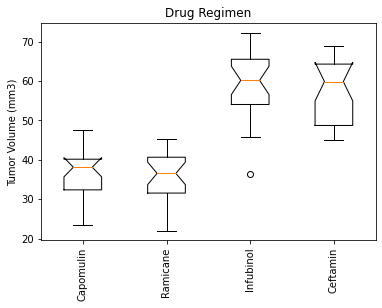

In [56]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol, drugs)
ax1.set_title('Drug Regimen')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], rotation=90)
ax1.set_ylabel('Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = combined_pharm_df.loc[(combined_pharm_df['Drug Regimen'] == 'Capomulin') & (combined_pharm_df['Mouse ID'] == 'x401')]

capomulin_df = capomulin_data[['Mouse ID', 'Drug Regimen','Tumor Volume (mm3)', 'Timepoint']]
#capomulin_df

line_plot = capomulin_df[['Tumor Volume (mm3)', 'Timepoint']]
line_plot 

,Tumor Volume (mm3),Timepoint
20,45.000000,0
21,45.473753,5
22,39.113891,10
23,39.776250,15
24,36.065835,20
25,36.617120,25
26,32.915292,30
27,30.206825,35
28,28.167397,40
29,28.484033,45


Text(0, 0.5, 'Tumor Volume (mm3)')

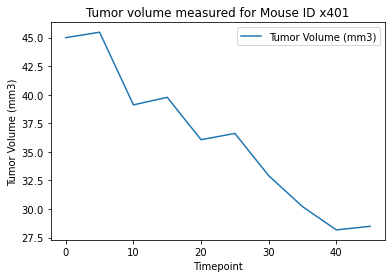

In [19]:
line_plot - line_plot.reset_index(drop=True)
line_plot.set_index("Timepoint").plot()

plt.title("Tumor volume measured for Mouse ID x401")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

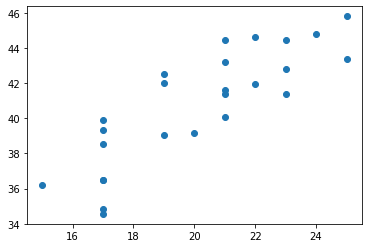

In [66]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_data = combined_pharm_df.loc[(combined_pharm_df['Drug Regimen'] == 'Capomulin'),:]
ave_mouse_weight = capo_data.groupby(capo_data["Mouse ID"])["Weight (g)"].mean()
ave_tumor_vol = capo_data.groupby(capo_data["Mouse ID"])["Tumor Volume (mm3)"].mean()

plt.scatter(ave_mouse_weight, ave_tumor_vol)
# plt.title("Average Tumor Volume in Relation to Average Mouse Weight for Capomulin")
# plt.xlabel("Average Weight of Mouse")
# plt.ylabel("Average Tumor Volume")

plt.show()

## Correlation and Regression

y = 0.95x + 21.55
The r-squared is: 0.7088568047708717


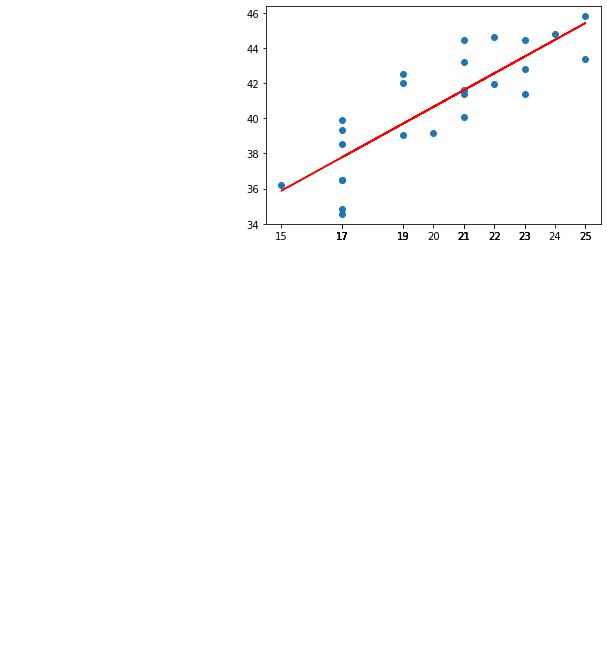

In [68]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(ave_mouse_weight, ave_tumor_vol)
regress_values = ave_mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(ave_mouse_weight, ave_tumor_vol)
plt.plot(ave_mouse_weight,regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# plt.title("Average Tumor Volume in Relation to Average Mouse Weight for Capomulin")
# plt.xlabel("Average Weight of Mouse")
# plt.ylabel("Average Tumor Volume")
print(f"The r-squared is: {rvalue**2}")
plt.xticks(ave_mouse_weight)
plt.show()

In [22]:
# Caculate correlation coefficient
corr = round(st.pearsonr(ave_mouse_weight,ave_tumor_vol)[0],4)
print(f'The correlation between weight and tumor value is {corr}')

The correlation between weight and tumor value is 0.8419
